<a href="https://colab.research.google.com/github/yunsing/Compsci760/blob/master/ClusteringHierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical clustering

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

# Case 1

We use ` sklearn`, we initalise data with random seeds.

(-15, 15)

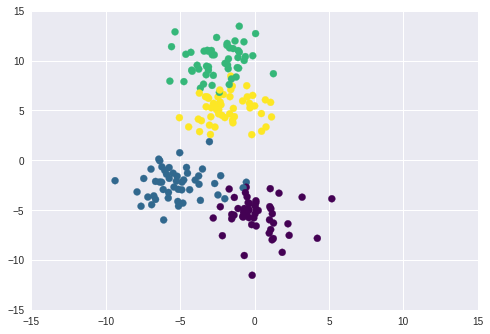

In [7]:
# import statements
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)

# create np array for data points
points = data[0]

# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

We used ` AgglomerativeClustering` from `sklearn`.

In [0]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


Dendrograms are hierarchical plots of clusters where the length of the bars represent the distance to the next cluster centre.


**Question**: Based on the dendogram how many clusters do you think exist in this dataset?

[0 1 0 0 2 1 0 1 1 2 2 0 1 0 2 0 0 0 2 2 2 0 0 0 0 0 0 1 0 0 0 2 2 1 1 2 2
 2 0 0 0 2 0 0 1 1 0 0 0 0 1 2 0 0 0 0 1 2 2 0 1 1 0 1 1 0 1 0 0 0 1 2 0 1
 0 0 2 0 0 1 2 0 2 2 2 2 0 1 0 2 1 0 1 0 0 1 1 0 1 0 2 1 0 0 0 1 0 1 2 0 1
 2 0 0 2 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 2 1 1 0 0 0 1 0 0 2 0 0 0 1 2 0 1 0
 1 2 0 2 0 1 1 0 0 1 1 1 0 0 1 1 2 2 2 0 1 1 1 1 2 0 1 0 2 1 0 0 1 0 0 0 2
 1 2 0 0 1 0 0 2 0 1 0 2 0 2 0]


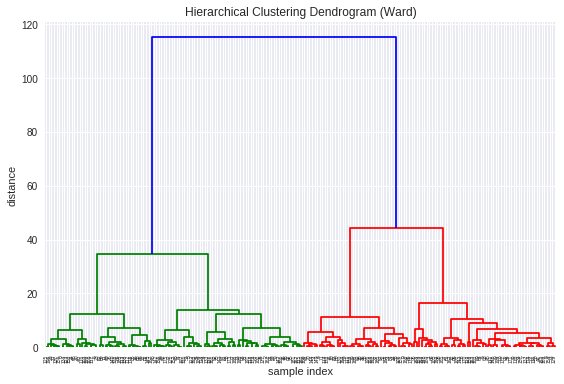

In [9]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))

# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')


y_hc = hc.fit_predict(points)
print(y_hc) ## print clusters 0,1,2

plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

**Whiskey dataset**

Let’s load it in.

In [10]:
whiskey = pd.read_csv('https://s3.eu-west-2.amazonaws.com/free.trainingdatascience.com/data/whiskies.csv')
cols = ['Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco',
       'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral']
X = whiskey[cols]
y = whiskey['Distillery']
display(X.head())
display(y.head())


,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1


0    Aberfeldy
1     Aberlour
2       AnCnoc
3       Ardbeg
4      Ardmore
Name: Distillery, dtype: object

Plot a dendrogram of the whiskey data.

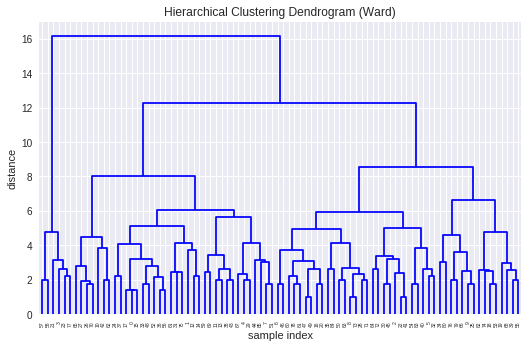

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage


linkage_matrix = linkage(X, 'ward')

figure = plt.figure(figsize=(7.5, 5))



dendrogram(
    linkage_matrix,
    color_threshold=0,
)

# create clusters
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart
y_hc = hc.fit_predict(X)

plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

Try playing with the different parameters in the dendrogram. Look up the aggomerative documentation.
        p
        truncate_mode

Plot a dendrogram of the whiskey data with p = 24.

**Question:** How many clusters are there in this dataset?

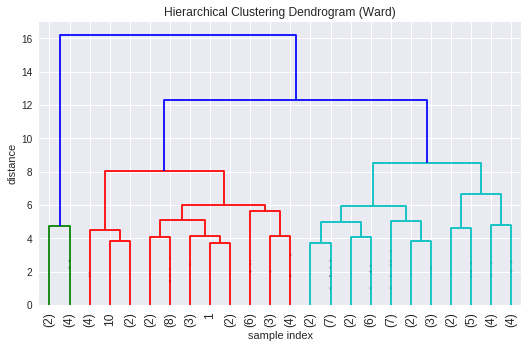

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()



One way to evaluate the quality of clustering is using a score, such as Silhouette Score. 

**Question**: Can you use this to evaluate the number of clusters in the dataset?

In [17]:
silhouette_score(X,hc.labels_,metric='euclidean')

0.3836194524864004

**Task** 

Try different linkage settings inkage : `{“ward”, “complete”, “average”, “single”}`. 

Try different affinity settings string or callable, default: “euclidean” such as:
`` “euclidean”, “l1”, “l2”, “manhattan”, “cosine”. If linkage is “ward”, only “euclidean” is accepted`.

**Question**: What did you observe?

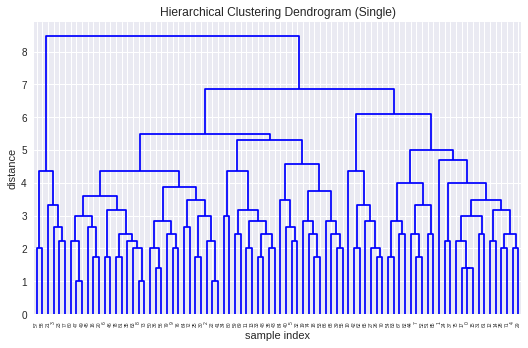

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X, 'complete')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Single)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()